(317, 1080, 1920)
(7489, 2)
1865


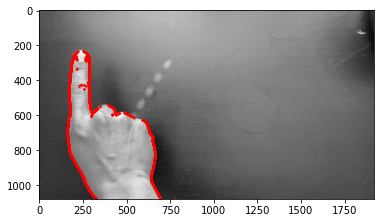

In [1]:
import skvideo.io
import matplotlib.pyplot as plt
from tracker import Tracker
from IPython import display
import time
from matplotlib import animation
import numpy as np
%load_ext autoreload
%autoreload 2

video = np.squeeze(skvideo.utils.rgb2gray(skvideo.io.vread('../../data/up_move_right.mp4'))/255)

print(video.shape)

vectors = [t for t in Tracker(video, threshold=0.1, region_size=15)]

In [ ]:
%%capture profile_results
import cProfile
import pandas as pd

cProfile.run('[t for t in Tracker(video)]')
## Parse the stdout text and split it into a table
data=[]
started=False

for l in profile_results.stdout.split("\n"):
    if not started:
        if l=="   ncalls  tottime  percall  cumtime  percall filename:lineno(function)":
            started=True
            data.append(l)
    else:
        data.append(l)
content=[]
for l in data:
    fs = l.find(" ",8)
    content.append(tuple([l[0:fs] , l[fs:fs+9], l[fs+9:fs+18], l[fs+18:fs+27], l[fs+27:fs+36], l[fs+36:]]))
prof_df = pd.DataFrame(content[1:], columns=content[0])

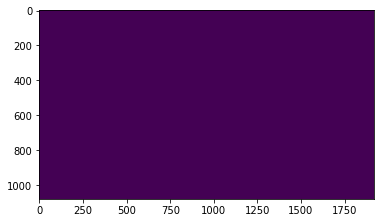

In [3]:
for i, t in enumerate(vectors):
    plt.gca().clear()
    plt.imshow(video[i])
    plt.quiver(t[:,1], t[:,0], t[:,3]*10, t[:,2]*10, color='red', scale_units='xy', scale=1, angles='xy' )
    #plt.scatter(t[:,1],t[:,0], s=1, color='r')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.01)

In [ ]:
figsize=(10,10)
fig, ax = plt.subplots(figsize=figsize)
img = ax.imshow(video[0])
print(vectors[0][:,0])
def animate(frame_no, img, vectors, ax):
    img.set_data(video[frame_no])
    quiv = ax.quiver(vectors[frame_no][:,1], vectors[frame_no][:,0], vectors[frame_no][:,2], vectors[frame_no][:,3], color='red', scale_units='xy', scale=1, angles='xy' )
    return [img, quiv]
ani = animation.FuncAnimation(fig, animate, range(len(vectors)), interval=50, blit=True, fargs=(img, vectors, ax))
mywriter = animation.FFMpegWriter(fps = 20,extra_args=['-threads', '30'])
ani.save("test.mp4",writer=mywriter)